Descripcion de variables:
- transaction_id: id de la transaccion por el socio
- user_id: id unico del socio
- transactional_amount: monto de transaccion por cada operacion 
- transaction_type: tipo de pago con el que se hizo la transaccion 
- time_of_transaction: tiempo que le tomo a efectuarse la transaccion
- device_used: dispositivo tecnologico que se uso para la transaccion 
- location: lugar de donde se realizó la transaccion 
- previous_fraudulent_transactions: identifica si hubo o nouna transaccion fraudulenta anterior a la actual
- account_age: tiempo de antiguedad del socio
- number_of_transactions_last_24h: numero de transacciones realizadas por el cliente en las ultimas 24 horas
- payment_method: tipo de pago usado para la transaccion
- fraudulent: 0 si la transaccion fue fraudulento, 1 si la transaccion es fraudulenta

## Importacion de Librerias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import snowflake.connector
from sqlalchemy import create_engine
import config 

## Conexion a Snowflake donde esta guardado el dataset

In [4]:
connection_url = f"snowflake://{config.user}:{config.password}@{config.account}/{config.database}/{config.schema}?warehouse={config.warehouse}"

# Crear el motor de conexión
engine = create_engine(connection_url)

# Verificar la conexión
try:
    with engine.connect() as connection:
        print("Conexión exitosa a Snowflake!")
except Exception as e:
    print(f"Error en la conexión: {e}")

Conexión exitosa a Snowflake!


# Crear la consulta al dataset

In [5]:
raw = pd.read_sql("SELECT * FROM RAW.BANCO", engine)

# Comenzar EDA

In [6]:
raw.head()

,transaction_id,user_id,transaction_amount,transaction_type,time_of_transaction,device_used,location,previous_fraudulent_transactions,account_age,number_of_transactions_last_24h,payment_method,fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,None,3,115,9,None,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [9]:
raw.shape

(51000, 12)

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transaction_id                    51000 non-null  object 
 1   user_id                           51000 non-null  int64  
 2   transaction_amount                48480 non-null  float64
 3   transaction_type                  51000 non-null  object 
 4   time_of_transaction               48448 non-null  float64
 5   device_used                       48527 non-null  object 
 6   location                          48453 non-null  object 
 7   previous_fraudulent_transactions  51000 non-null  int64  
 8   account_age                       51000 non-null  int64  
 9   number_of_transactions_last_24h   51000 non-null  int64  
 10  payment_method                    48531 non-null  object 
 11  fraudulent                        51000 non-null  int64  
dtypes: f

In [10]:
for col in raw.columns:
    print(f"Valores unicos de {col}:", raw[col].unique())

Valores unicos de transaction_id: ['T1' 'T2' 'T3' ... 'T49998' 'T49999' 'T50000']
Valores unicos de user_id: [4174 4507 1860 ... 4616 2261 4210]
Valores unicos de transaction_amount: [1292.76 1554.58 2395.02 ...  647.11 2446.65 2867.43]
Valores unicos de transaction_type: ['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Valores unicos de time_of_transaction: [16. 13. nan 15. 19.  2.  3. 20.  0. 12. 21. 14.  7.  4. 17. 10.  5.  8.
 11. 18.  1. 22.  9.  6. 23.]
Valores unicos de device_used: ['Tablet' 'Mobile' 'Desktop' None 'Unknown Device']
Valores unicos de location: ['San Francisco' 'New York' None 'Chicago' 'Boston' 'Houston' 'Miami'
 'Los Angeles' 'Seattle']
Valores unicos de previous_fraudulent_transactions: [0 4 3 2 1]
Valores unicos de account_age: [119  79 115   3  57  96   6  13 110  66   4  68  25 113  52  65  21  61
  22  43   7 103   8  71  63  99  81  82   2  85  14  31 108 116  15  51
  46  94  93  70  10   1  58 112  41  27  19  35  18 1

In [11]:
print('Valores nulos:\n', raw.isnull().sum())

Valores nulos:
 transaction_id                         0
user_id                                0
transaction_amount                  2520
transaction_type                       0
time_of_transaction                 2552
device_used                         2473
location                            2547
previous_fraudulent_transactions       0
account_age                            0
number_of_transactions_last_24h        0
payment_method                      2469
fraudulent                             0
dtype: int64


## Analisis de variabels y estadisticos descriptivos:

In [12]:
# Estadisticos descriptivos
print("\nEstadisticos descriptivos:")
print(raw.describe())


Estadisticos descriptivos:
            user_id  transaction_amount  time_of_transaction  \
count  51000.000000        48480.000000         48448.000000   
mean    3005.110176         2996.249784            11.488400   
std     1153.121107         5043.932555             6.922954   
min     1000.000000            5.030000             0.000000   
25%     2007.000000         1270.552500             5.000000   
50%     2996.000000         2524.100000            12.000000   
75%     4006.000000         3787.240000            17.000000   
max     4999.000000        49997.800000            23.000000   

       previous_fraudulent_transactions   account_age  \
count                      51000.000000  51000.000000   
mean                           1.995725     60.033902   
std                            1.415150     34.384131   
min                            0.000000      1.000000   
25%                            1.000000     30.000000   
50%                            2.000000     60.000000

In [16]:
print("\n Medios de pago más usados:")
print(raw['transaction_type'].value_counts().head())


 Medios de pago más usados:
Bill Payment       10340
Bank Transfer      10276
ATM Withdrawal     10164
POS Payment        10126
Online Purchase    10094
Name: transaction_type, dtype: int64


In [17]:
print("\n Dispositivos más usados:")
print(raw['device_used'].value_counts().head(10))


 Dispositivos más usados:
Desktop           15795
Mobile            15614
Tablet            15588
Unknown Device     1530
Name: device_used, dtype: int64


In [18]:
print("\n Ciudades donde se realizan más transacciones:")
print(raw['location'].value_counts().head(10))


 Ciudades donde se realizan más transacciones:
Boston           6149
New York         6110
Seattle          6104
Chicago          6071
Houston          6031
Los Angeles      6012
Miami            5991
San Francisco    5985
Name: location, dtype: int64


Text(0.5, 1.0, 'Monto de Transacciones por Medio de Pago')

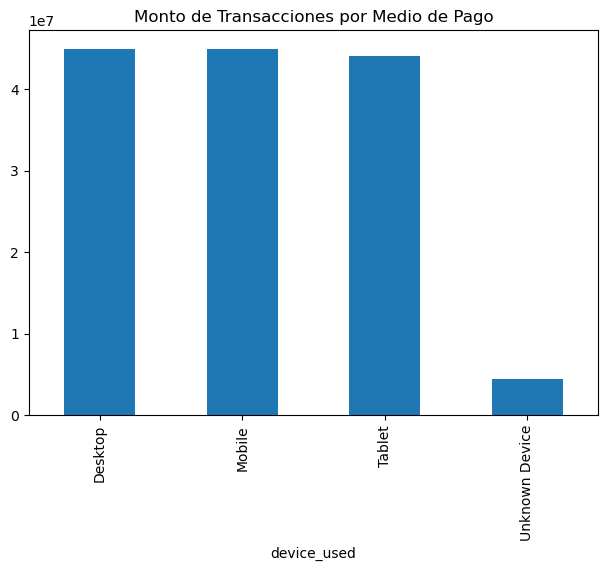

In [ ]:
plt.figure(figsize=(25, 5))

# Transacciones totales
plt.subplot(1, 3, 1)
raw.groupby('transaction_type')['transaction_amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Monto de Transacciones por Medio de Pago')

Text(0.5, 1.0, 'Monto de Transacciones por dispositivo')

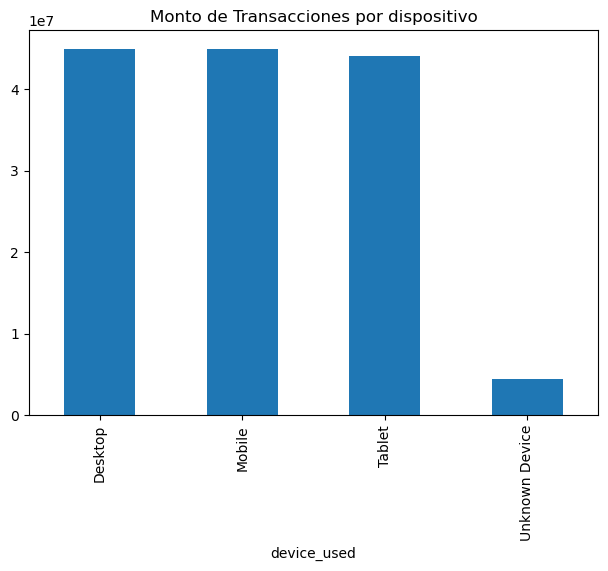

In [23]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 2)
raw.groupby('device_used')['transaction_amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Monto de Transacciones por dispositivo')

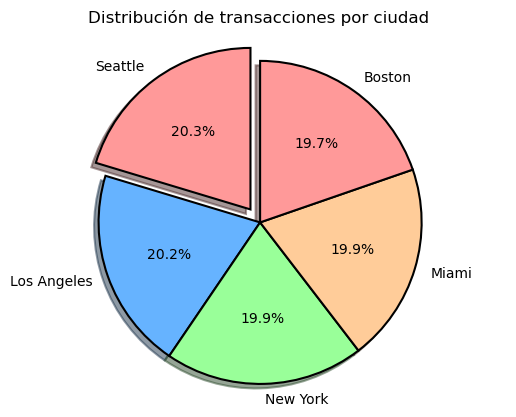

In [25]:
platform_sales_series = raw.groupby('location').transaction_amount.mean().sort_values(ascending = False)


plt.pie(platform_sales_series.head(), 
        labels=platform_sales_series.head().index,  
        autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],  
        explode=(0.1, 0, 0,0,0),  
        shadow=True,  
        startangle=90,  
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

plt.axis('equal')
plt.title('Distribución de transacciones por ciudad')

plt.show()
plt.close()

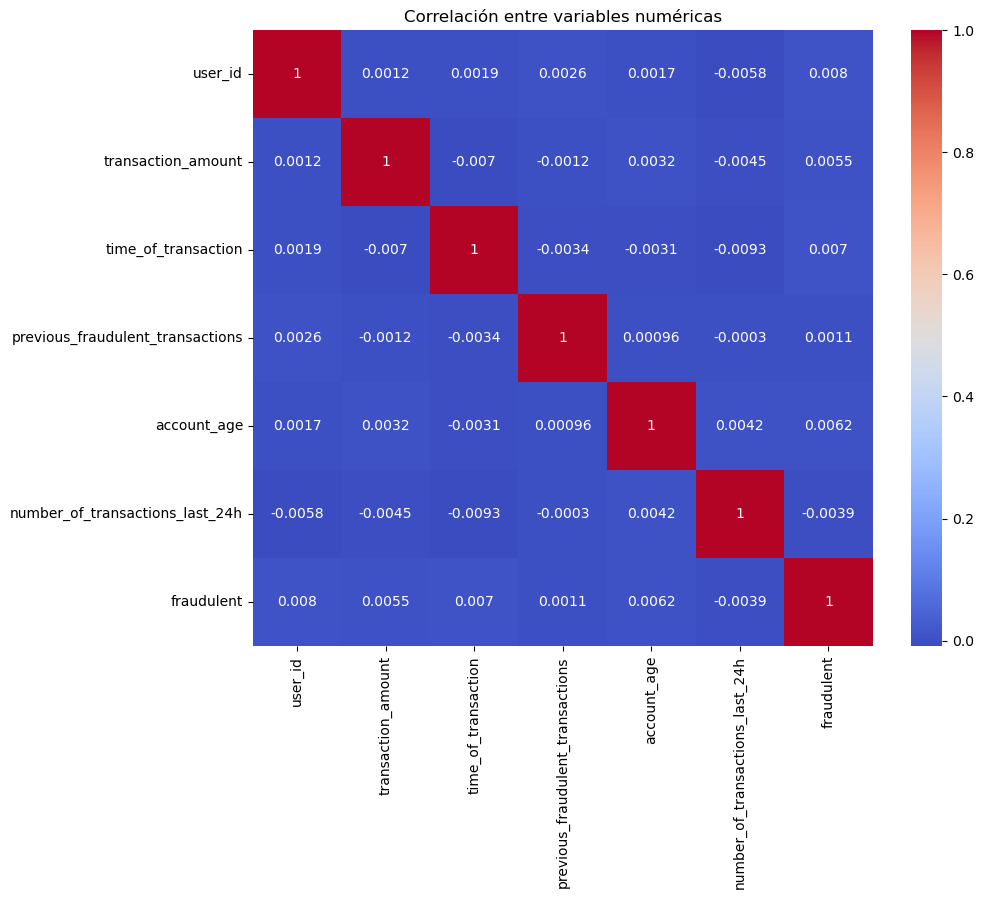

In [26]:
numeric_df = raw.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlación entre variables numéricas')
    plt.show()

In [28]:
media_por_ciudad = raw.pivot_table(
    index=['location'],
    columns=['transaction_type'],
    values='transaction_amount',
    aggfunc=np.mean
).round(2)

print("\nMedia de Monto de Transacciones por Ciudad:")
media_por_ciudad


Media de Monto de Transacciones por Ciudad:


transaction_type,ATM Withdrawal,Bank Transfer,Bill Payment,Online Purchase,POS Payment
location,,,,,
Boston,3040.02,2958.80,2978.75,3064.44,2865.89
Chicago,3084.58,2967.22,3031.77,2822.43,2933.17
Houston,2982.12,2931.89,3024.31,2934.66,3015.67
Los Angeles,3098.52,3076.66,2905.71,2977.16,3204.79
Miami,2735.41,3056.40,3302.87,3022.54,2917.00
New York,2951.57,3347.25,2858.81,3012.17,2913.82
San Francisco,2669.26,2957.61,3019.98,3114.21,2861.80
Seattle,3172.22,3091.38,3139.23,3093.29,2892.03


In [31]:
suma_por_dispositivo = raw.pivot_table(
    index=['location'],
    columns=['device_used'],
    values='transaction_amount',
    aggfunc='sum'
).round(2)

print("\nSuma de Monto de Transacciones por Dispositivo:")
suma_por_dispositivo


Suma de Monto de Transacciones por Dispositivo:


device_used,Desktop,Mobile,Tablet,Unknown Device
location,,,,
Boston,5537641.73,5286232.19,5202128.69,473461.83
Chicago,5551067.63,5071140.19,5275924.20,429729.81
Houston,5230568.00,5222039.70,5191620.35,511771.65
Los Angeles,5233040.59,5778669.67,5156041.49,554733.26
Miami,5210077.32,5214425.34,5441940.26,586751.50
New York,5419990.99,5617152.35,5183159.01,426449.95
San Francisco,5150447.25,5007064.15,5077003.42,612115.95
Seattle,5378088.31,5649452.06,5405825.49,491439.00
